# **Credit Card Fraud Detection System**

### This script analyzes credit card transactions to detect fraudulent activity using:
1. Deep Neural Networks
2. Random Forest
3. Decision Trees

### Key Steps:
1. Data Exploration and Preprocessing
2. Model Training and Evaluation
3. Handling Class Imbalance
4. Performance Comparison

### 1. Import Libraries and Load Data


In [1]:
# 1. Import Libraries and Load Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random
import warnings
warnings.filterwarnings('ignore')

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

data = pd.read_csv('creditcard.csv')

### 2. Exploratory Data Analysis


Dataset shape: (284807, 31)

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of frauds: 0.1727%

Descriptive statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


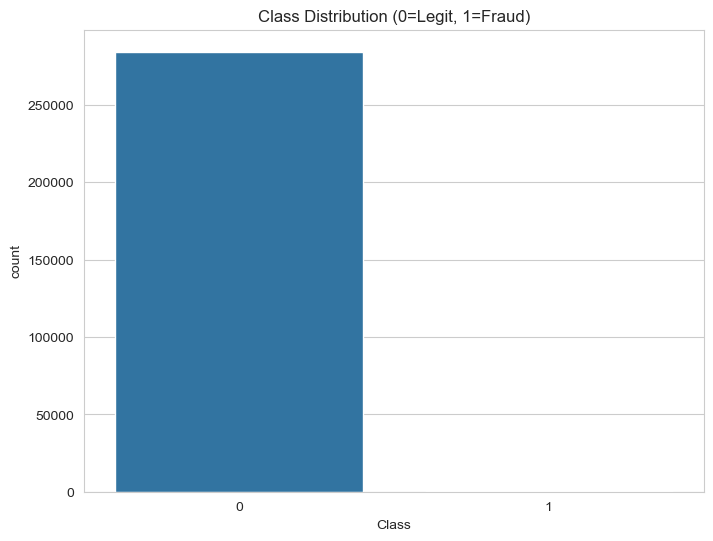

In [2]:
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
display(data.head())

print("\nClass distribution:")
print(data['Class'].value_counts())
print("\nPercentage of frauds: {:.4f}%".format(data['Class'].mean()*100))

print("\nDescriptive statistics:")
display(data.describe())

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0=Legit, 1=Fraud)')
plt.show()

### 3. Data Preprocessing


In [3]:
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(columns=['Amount', 'Time'])
X = data.drop(columns=['Class'])
y = data['Class']

### 4. Model Building and Evaluation

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step


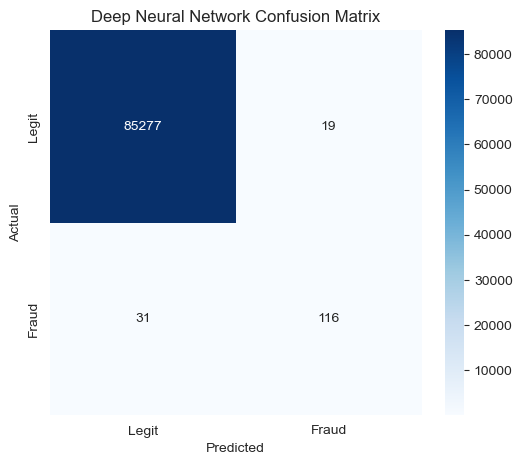

In [5]:
# Build DNN
dnn_model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(24, activation='relu'),
    Dropout(0.4),
    Dense(20, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.fit(X_train, y_train, batch_size=15, epochs=5, verbose=0)

y_pred = dnn_model.predict(X_test).round()
cm = confusion_matrix(y_test, y_pred)
metrics = {
    'Model': 'Deep Neural Network',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title('Deep Neural Network Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
results = pd.concat([results, pd.DataFrame([metrics])], ignore_index=True)

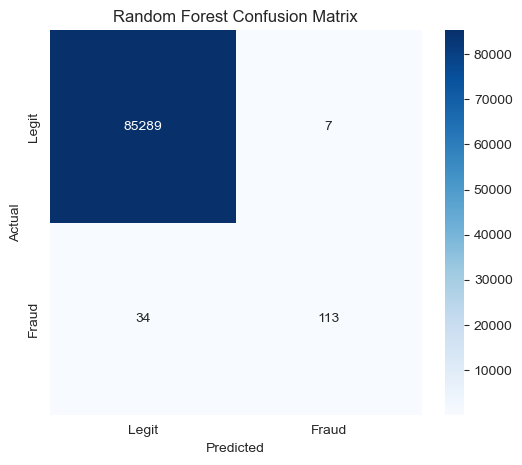

In [6]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0, criterion='entropy')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
metrics = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
results = pd.concat([results, pd.DataFrame([metrics])], ignore_index=True)

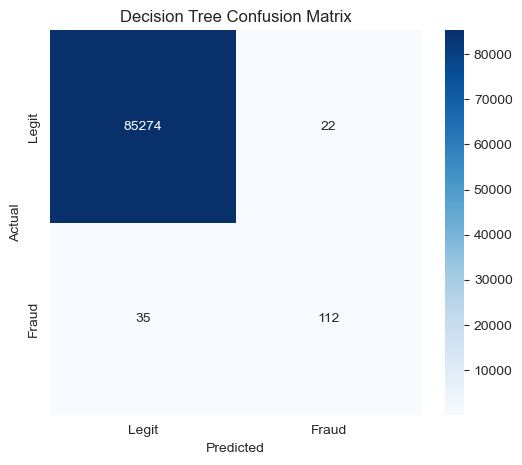


Model Performance Comparison (Imbalanced Data):


,Model,Accuracy,Precision,Recall,F1 Score
0,Deep Neural Network,0.999415,0.859259,0.789116,0.822695
1,Random Forest,0.999520,0.941667,0.768707,0.846442
2,Decision Tree,0.999333,0.835821,0.761905,0.797153


In [7]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
metrics = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
results = pd.concat([results, pd.DataFrame([metrics])], ignore_index=True)

print("\nModel Performance Comparison (Imbalanced Data):")
display(results)

### 5. Handle Class Imbalance

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step


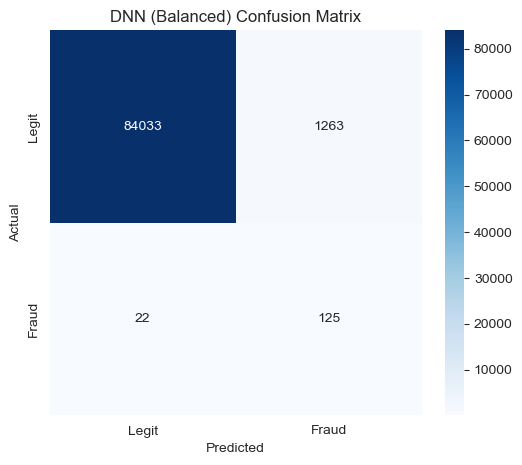


Final Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
0,Deep Neural Network,0.999415,0.859259,0.789116,0.822695
1,Random Forest,0.999520,0.941667,0.768707,0.846442
2,Decision Tree,0.999333,0.835821,0.761905,0.797153
3,DNN (Balanced),0.984961,0.090058,0.850340,0.162866


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pos_index = y_train[y_train == 1].index
neg_index = y_train[y_train == 0].index
undersampled_neg_index = np.random.choice(neg_index, size=len(pos_index), replace=False)
new_indexes = np.concatenate([pos_index, undersampled_neg_index])
X_train_balanced = X_train.loc[new_indexes]
y_train_balanced = y_train[new_indexes]

X_train_balanced = np.array(X_train_balanced)
y_train_balanced = np.array(y_train_balanced)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Train DNN (Balanced)
dnn_model_balanced = Sequential([
    Dense(16, input_dim=X_train_balanced.shape[1], activation='relu'),
    Dense(24, activation='relu'),
    Dropout(0.4),
    Dense(20, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
dnn_model_balanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model_balanced.fit(X_train_balanced, y_train_balanced, batch_size=15, epochs=5, verbose=0)

y_pred = dnn_model_balanced.predict(X_test).round()
cm = confusion_matrix(y_test, y_pred)
metrics = {
    'Model': 'DNN (Balanced)',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title('DNN (Balanced) Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
results = pd.concat([results, pd.DataFrame([metrics])], ignore_index=True)

print("\nFinal Model Performance Comparison:")
display(results)

### 6. Feature Importance


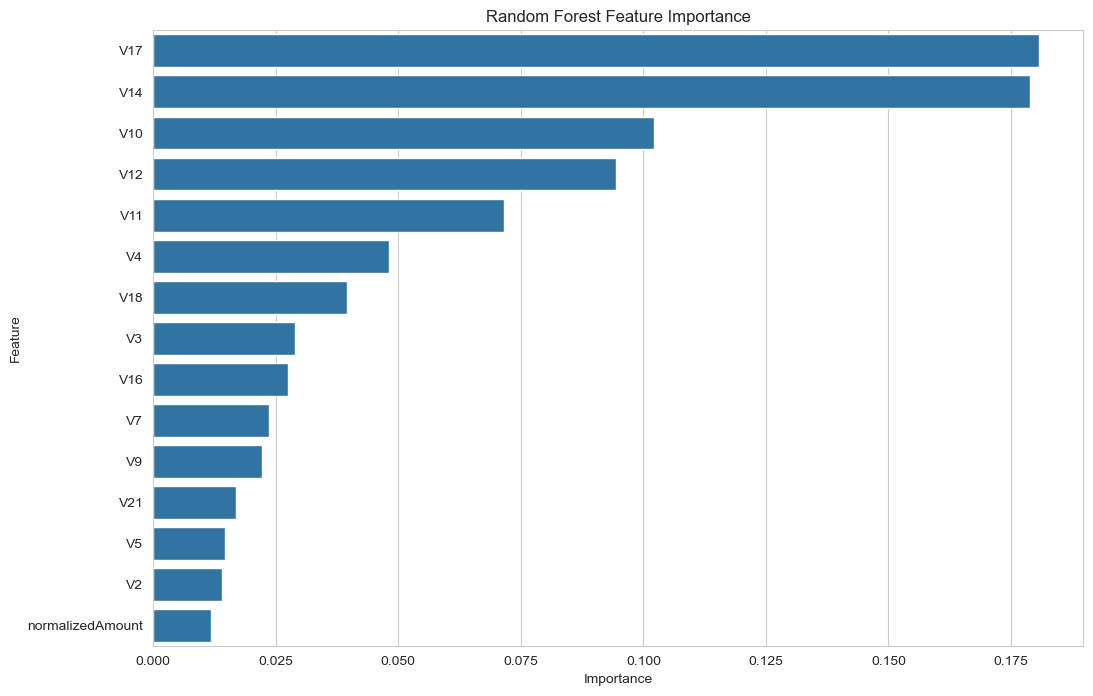

In [9]:
if hasattr(rf_model, 'feature_importances_'):
    importance = rf_model.feature_importances_
    feature_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values('Importance', ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_imp.head(15))
    plt.title('Random Forest Feature Importance')
    plt.show()

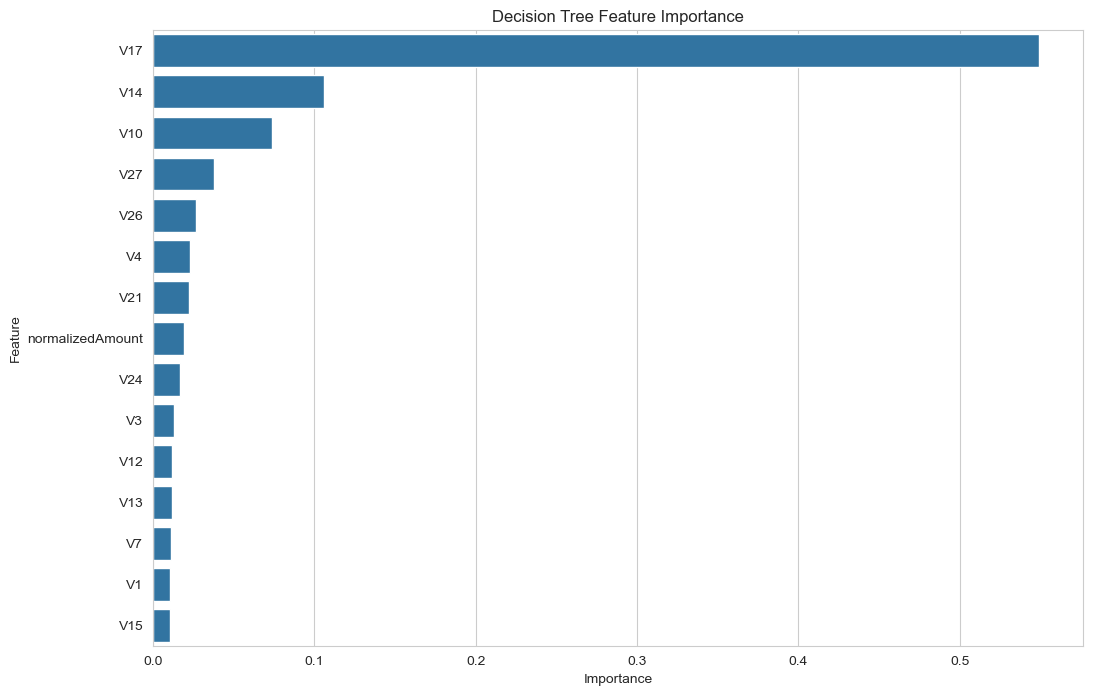

In [10]:
if hasattr(dt_model, 'feature_importances_'):
    importance = dt_model.feature_importances_
    feature_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values('Importance', ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_imp.head(15))
    plt.title('Decision Tree Feature Importance')
    plt.show()

### 7. Final Summary


In [11]:
print("\nFinal Model Performance Summary:")
display(results.sort_values('Recall', ascending=False))

print("\nRecommendations:")
print("- For fraud detection, recall (ability to catch frauds) is often more important than precision")
print("- The balanced DNN model shows improved recall compared to imbalanced models")
print("- Consider ensemble methods or more sophisticated neural architectures for further improvement")
print("- Regularly retrain models with new data to maintain performance")



Final Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score
3,DNN (Balanced),0.984961,0.090058,0.850340,0.162866
0,Deep Neural Network,0.999415,0.859259,0.789116,0.822695
1,Random Forest,0.999520,0.941667,0.768707,0.846442
2,Decision Tree,0.999333,0.835821,0.761905,0.797153



Recommendations:
- For fraud detection, recall (ability to catch frauds) is often more important than precision
- The balanced DNN model shows improved recall compared to imbalanced models
- Consider ensemble methods or more sophisticated neural architectures for further improvement
- Regularly retrain models with new data to maintain performance
